In [1]:
import numpy as np
import pandas as pd
import numba
import matplotlib.pyplot as plt

In [22]:
path = '/content/dataprofile.txt'
data = np.loadtxt(path)

In [24]:
data = np.transpose(data)

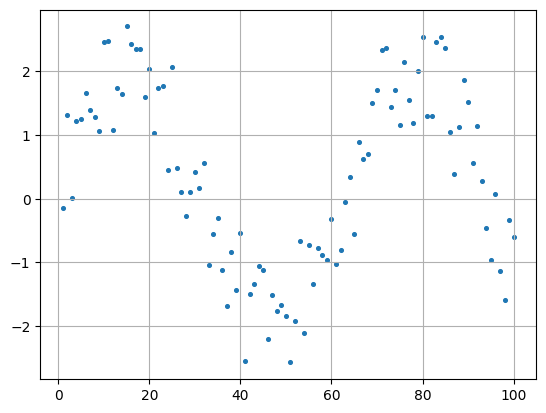

In [28]:
plt.grid()
plt.scatter(data[0], data[1], s= 7)


In [47]:
def threepoint(x, f):
  m = len(f)
  f_prime = np.zeros(m-2)

  for i in range(1,m-2):
    dx = x[i+1] - x[i]
    f_prime[i] = (f[i+1] - f[i-1])/(2*dx) 

  return f_prime

def fivepoint(x, f):
  m = len(f)
  f_prime = np.zeros(m-4)

  for i in range(2,m-4):
    dx = x[i+1] - x[i]
    f_prime[i] = (8*f[i+1] - 8*f[i-1] - f[i+2] + f[i-2])/(12*dx)
  return f_prime

def sevenpoint(x, f):
  m = len(f)
  f_prime = np.zeros(m-3)

  for i in range(3,m-3):
    dx = x[i+1] - x[i]
    f_prime[i] = (-45*(f[i+1] - f[i-1]) + 9*(f[i+2] - f[i-2]) + f[i+3] - f[i-3])/(-46*dx)
  
  return f_prime

def ninepoint(x, f):
  m = len(f)
  f_prime = np.zeros(m-4)

  for i in range(4,m-4):
    dx = x[i+1] - x[i]
    f_prime[i] = (224*(f[i+1] - f[i-1]) - 56*(f[i+2] - f[i-2]) + (32/3)*(f[i+3] - f[i-3]) + (f[i+4] - f[i-4]))/((536/3)*dx)
  
  return f_prime

In [48]:
three_point_CDF = threepoint(data[0], data[1])
five_point_CDF = fivepoint(data[0], data[1])
seven_point_CDF = sevenpoint(data[0], data[1])
nine_point_CDF = ninepoint(data[0], data[1])

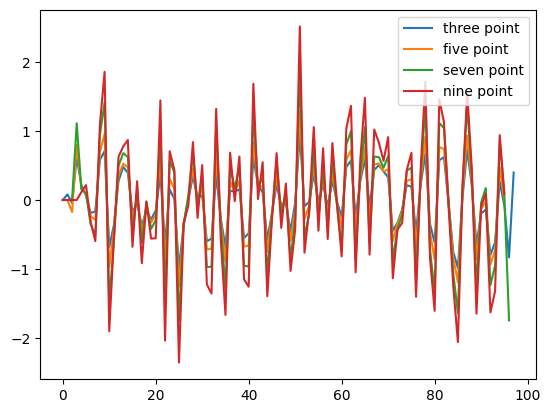

In [49]:
plt.plot(three_point_CDF, label = 'three point')
plt.plot(five_point_CDF, label = 'five point')
plt.plot(seven_point_CDF, label = 'seven point')
plt.plot(nine_point_CDF, label = 'nine point')
plt.legend()